# Human Activity Recognition

## Data Exploration

### Sample

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
sample_train = pd.read_csv('./datasets/train/C09/S1.csv')

In [3]:
sample_train

,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z
0,1.704531,0.312418,-2.768649,0.037130,0.008349,0.012471
1,1.716981,0.131910,-2.880000,0.035837,0.009477,0.013198
2,1.885057,0.108767,-2.857297,0.034913,0.013539,0.016627
3,1.800736,-0.115710,-2.966486,0.034544,0.018277,0.018082
4,1.759424,-0.115710,-3.019460,0.035468,0.017600,0.018082
...,...,...,...,...,...,...
12495,0.354827,2.455378,4.643243,-0.012931,-0.049867,-0.006443
12496,0.371805,2.652086,4.572973,0.007204,-0.051446,-0.005508
12497,0.441412,2.895078,4.456216,0.022722,-0.051897,-0.004053
12498,0.489515,3.050130,4.367568,0.030111,-0.058216,-0.002182


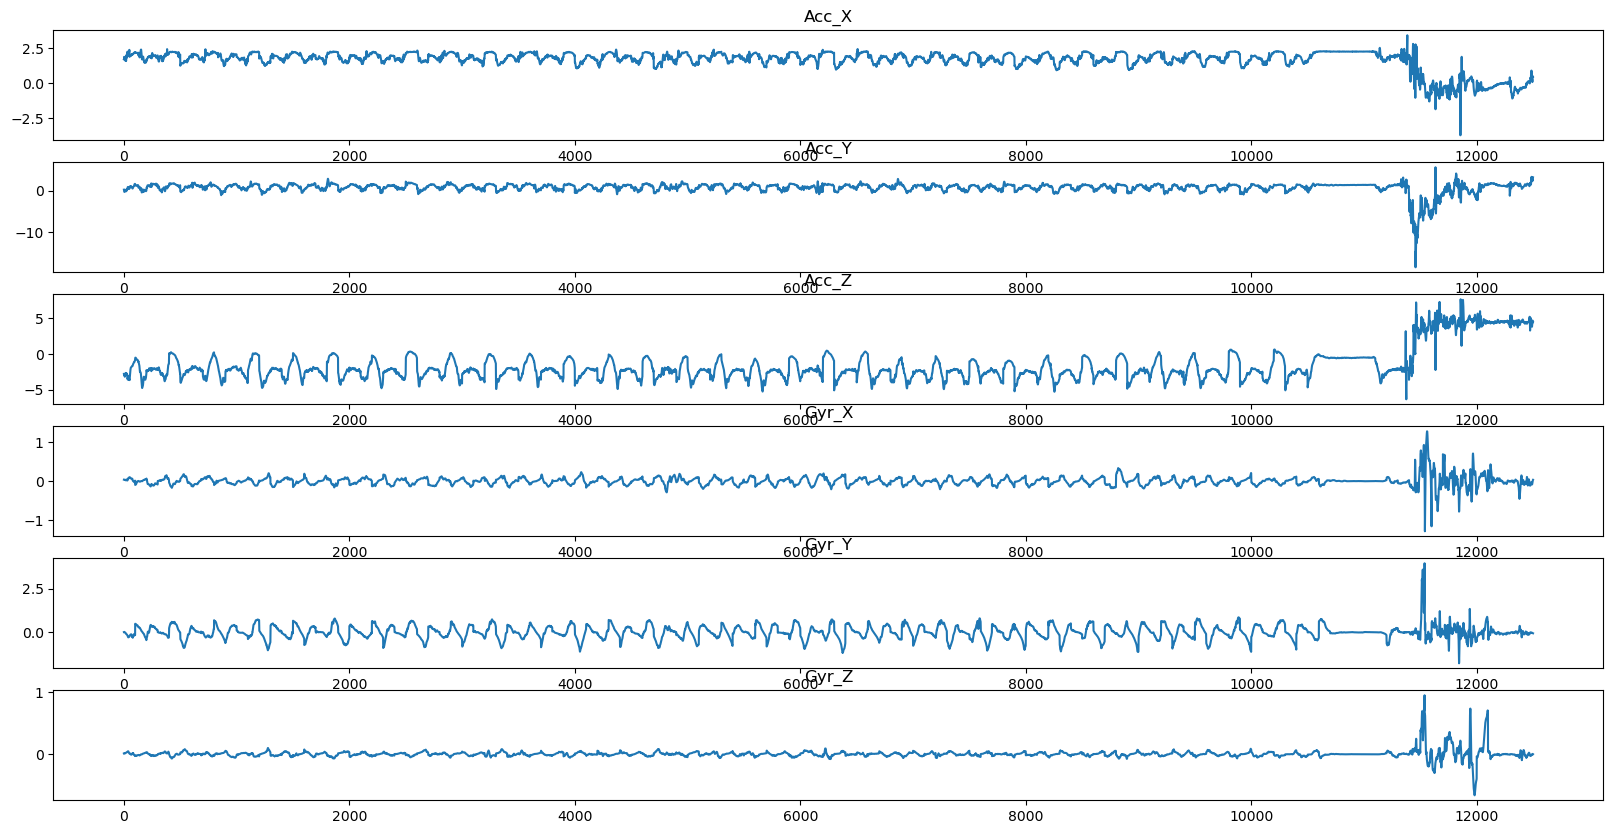

In [4]:
fig , axes = plt.subplots(6 , 1 , figsize = (20 , 10))

for idx , col in enumerate (sample_train.columns) :
    
    axes[idx].plot(sample_train[col])
    axes[idx].set_title(col)

plt.show()

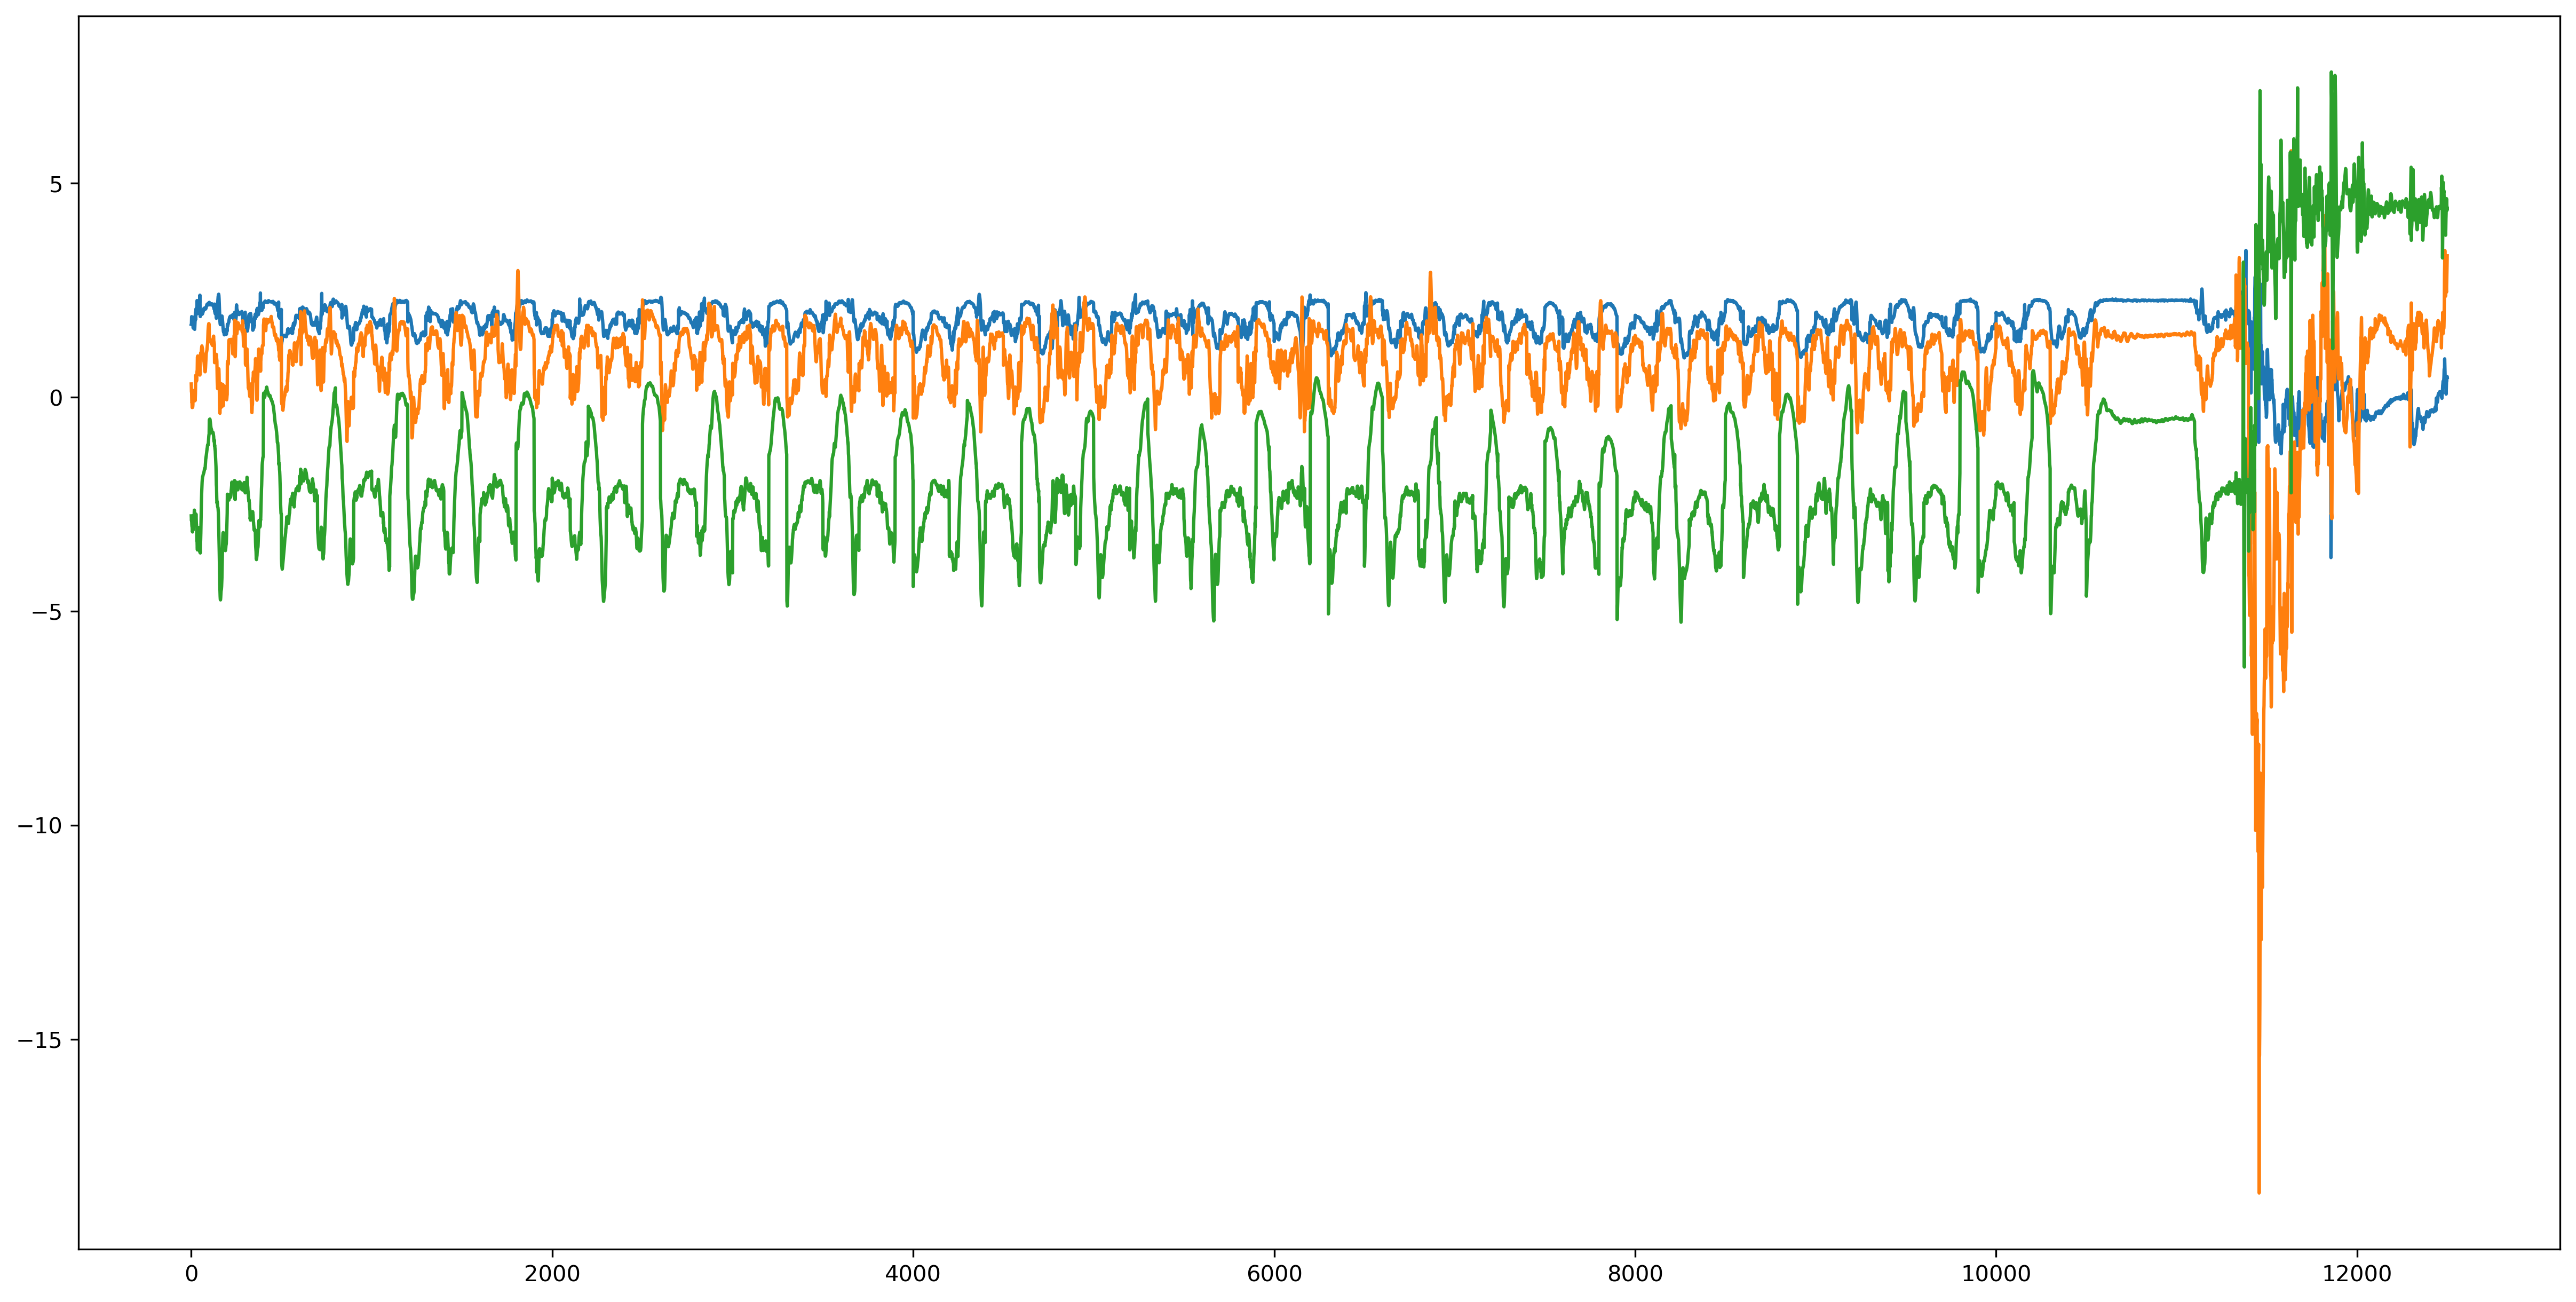

In [5]:
figure(figsize=(20 , 10), dpi=300)

for idx , col in enumerate (sample_train.columns[ : 3]) :
    
    plt.plot(sample_train[col][ : ])

plt.show()

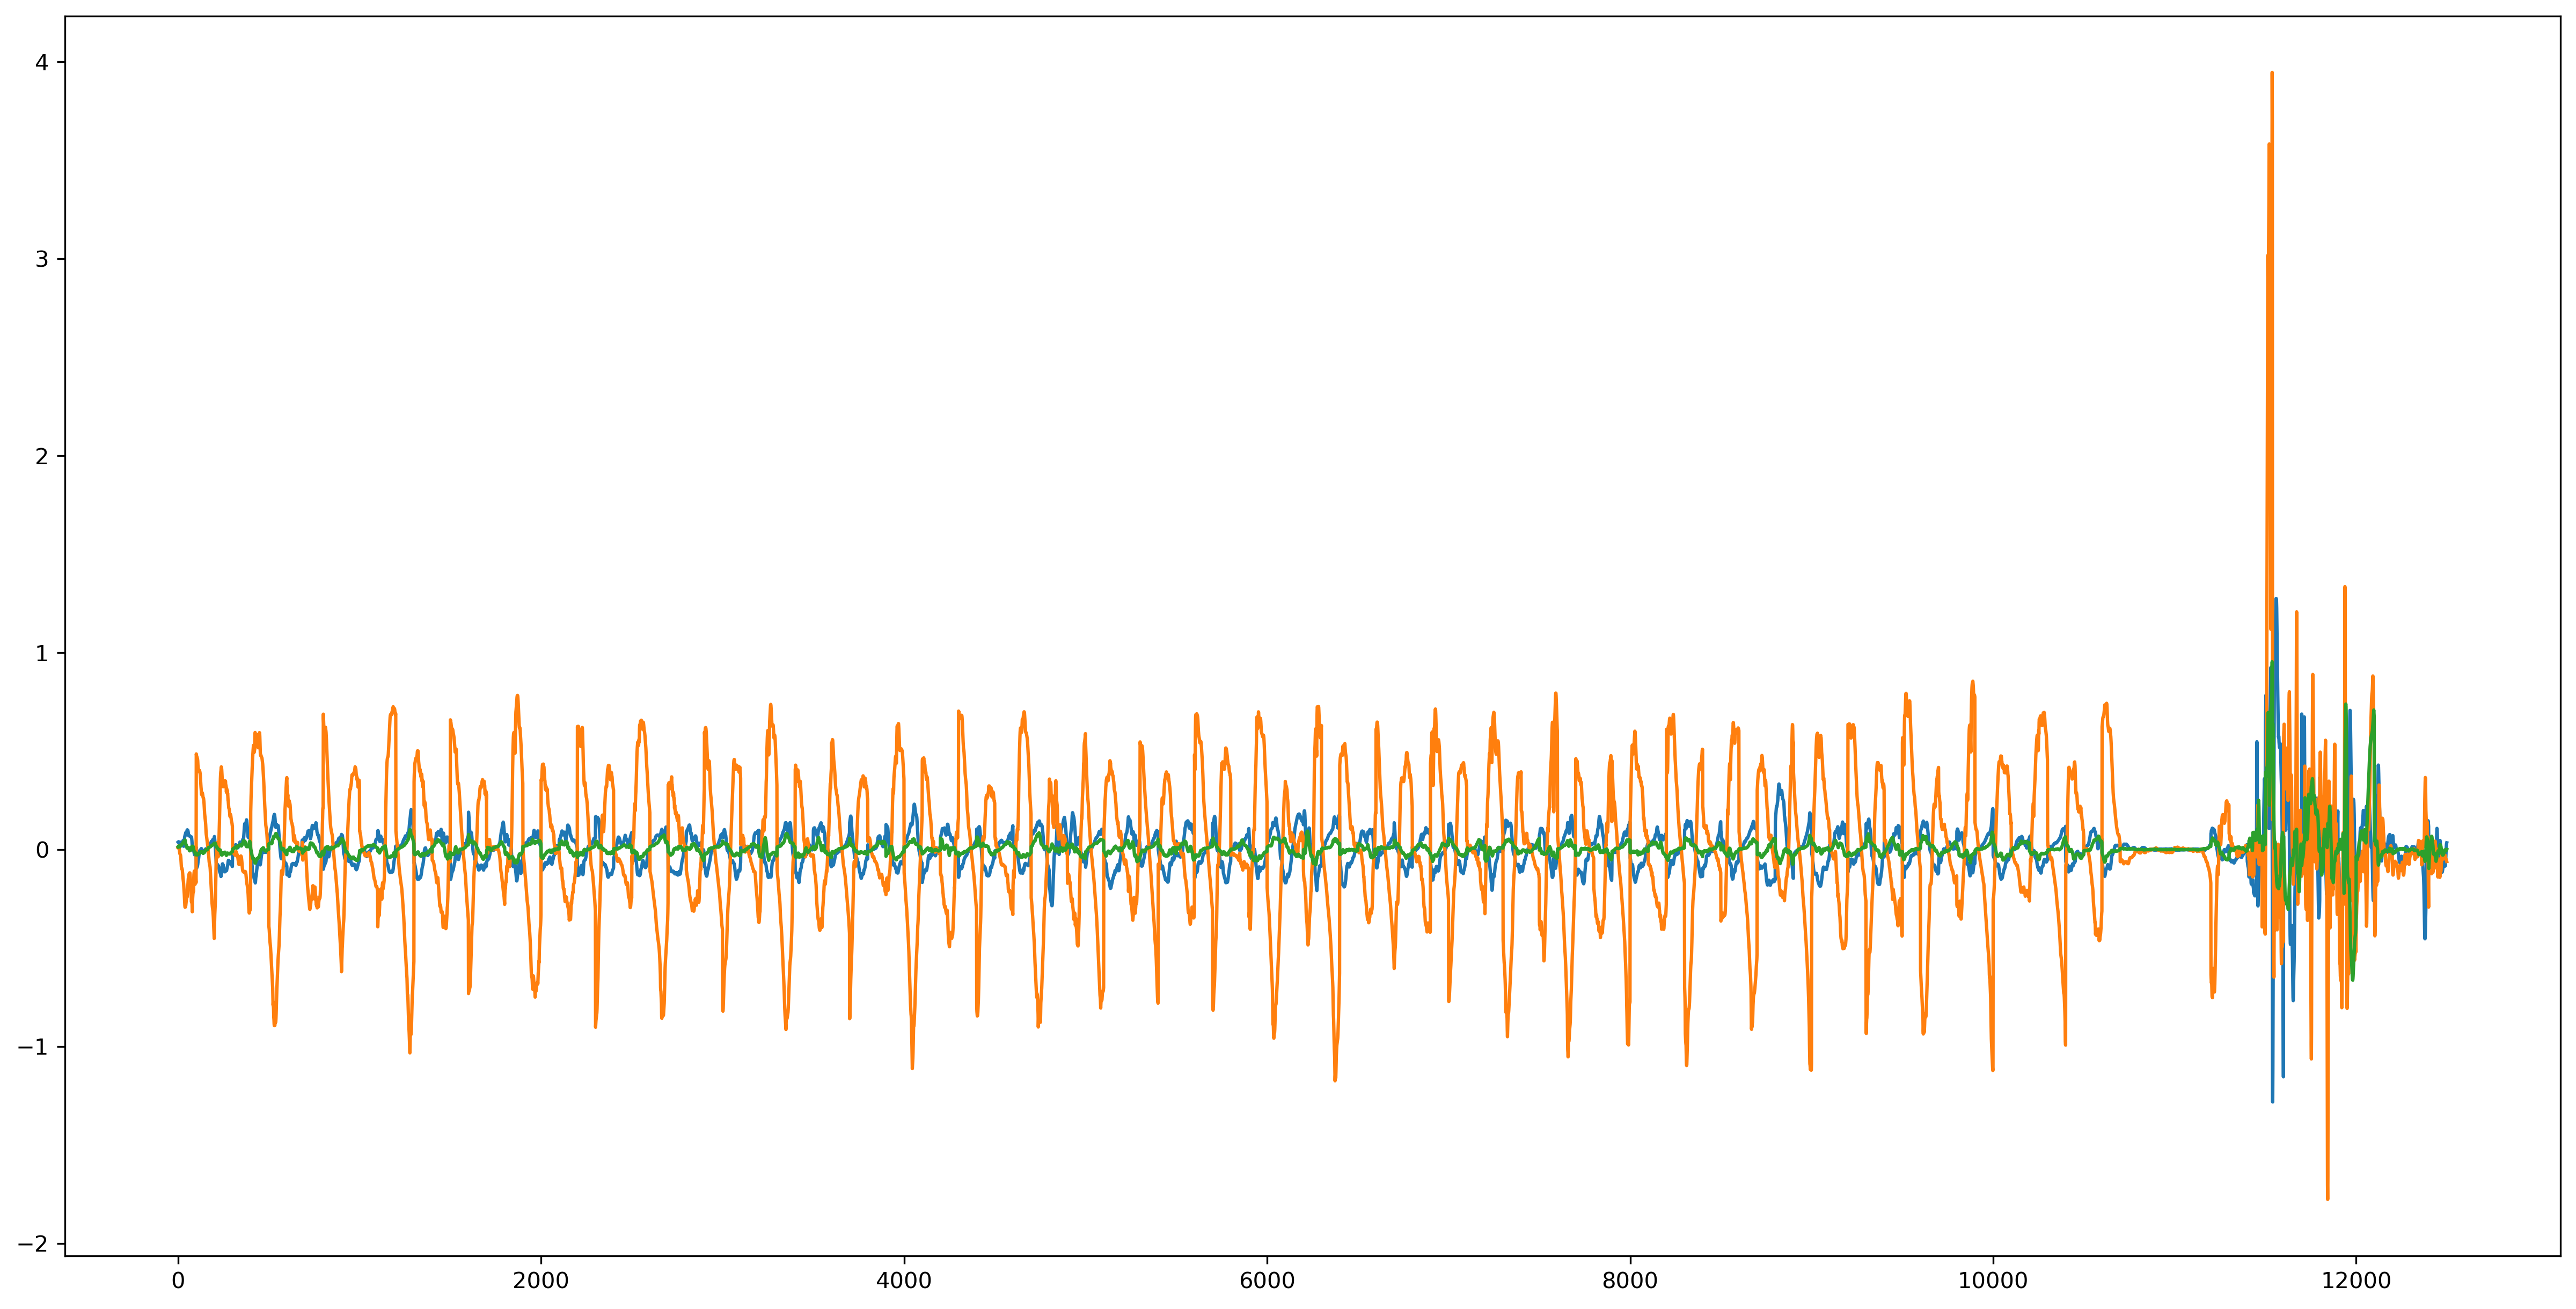

In [6]:
figure(figsize=(20 , 10), dpi=300)

for idx , col in enumerate (sample_train.columns[3 :]) :
    
    plt.plot(sample_train[col][ : ])

plt.show()

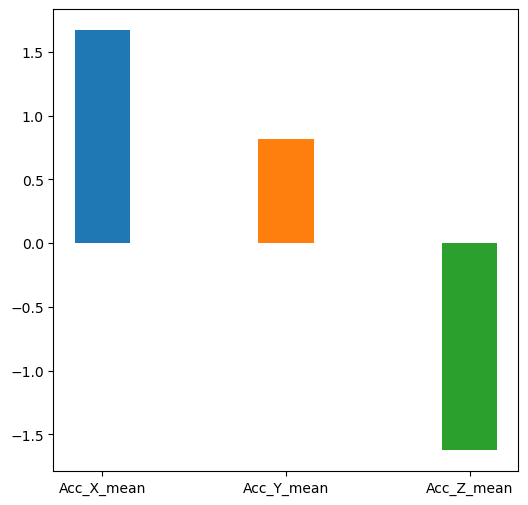

In [7]:
figure(figsize=(6 , 6), dpi=100)

for idx , col in enumerate(sample_train.columns[ : 3]):
    
    plt.bar(f'{col}_mean' , sample_train[col].mean() ,  width=0.3)
    
plt.show()

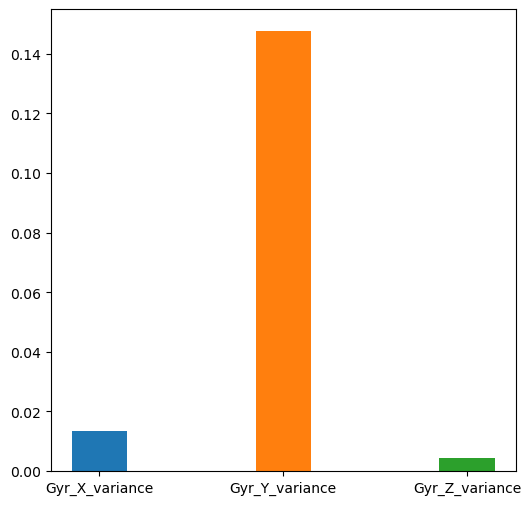

In [8]:
figure(figsize=(6 , 6), dpi=100)

for idx , col in enumerate(sample_train.columns[3 : ]):
    
    plt.bar(f'{col}_variance' , sample_train[col].var() ,  width=0.3)
    
plt.show()

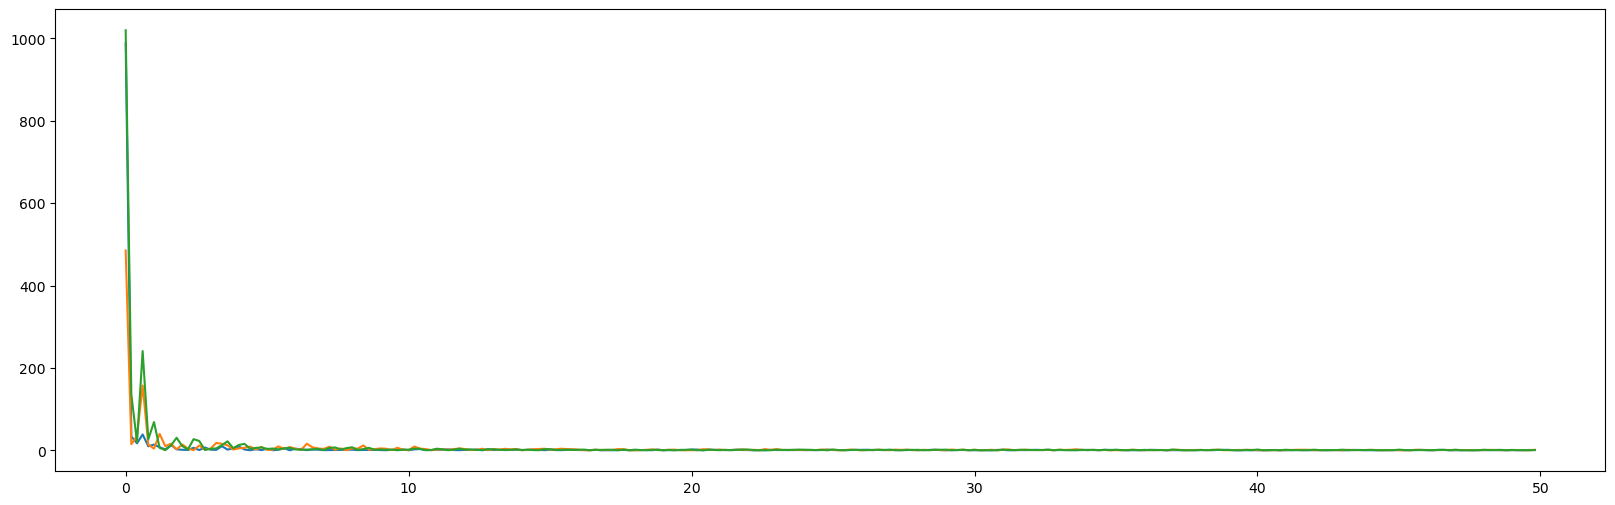

In [9]:
figure(figsize=(20 , 6), dpi=100)

start = 0
divide = 2

for idx , col in enumerate (sample_train.columns[ : 3]) :
    
    mag = np.fft.fft(sample_train[col][ : 500])
    freq = np.fft.fftfreq(len(sample_train[col][ : 500])) * 100
    
    plt.plot(freq[start : len(freq) // divide] , np.abs(mag.real[start : len(freq) // divide]))

plt.show()

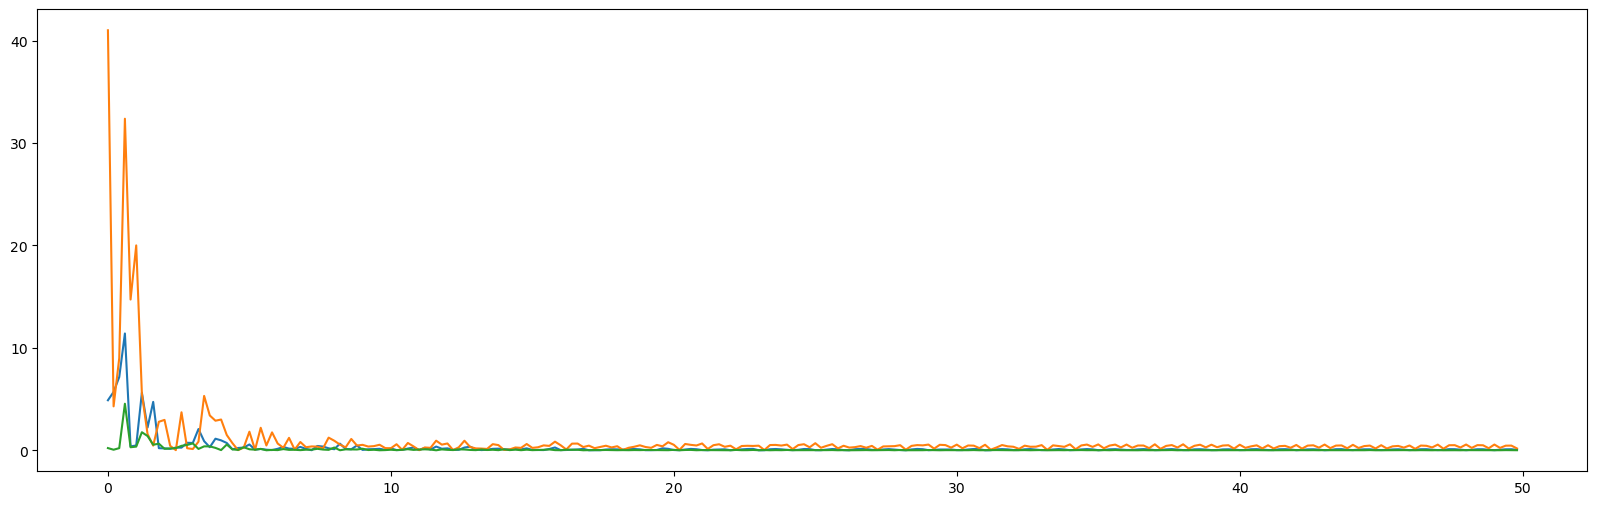

In [10]:
figure(figsize=(20 , 6), dpi=100)

start = 0
divide = 2

for idx , col in enumerate (sample_train.columns[3 : ]) :
    
    mag = np.fft.fft(sample_train[col][ : 500])
    freq = np.fft.fftfreq(len(sample_train[col][ : 500])) * 100
    
    plt.plot(freq[start : len(freq) // divide] , np.abs(mag.real[start : len(freq) // divide]))

plt.show()

### All Classes

In [11]:
import glob
import os
from matplotlib.pyplot import figure

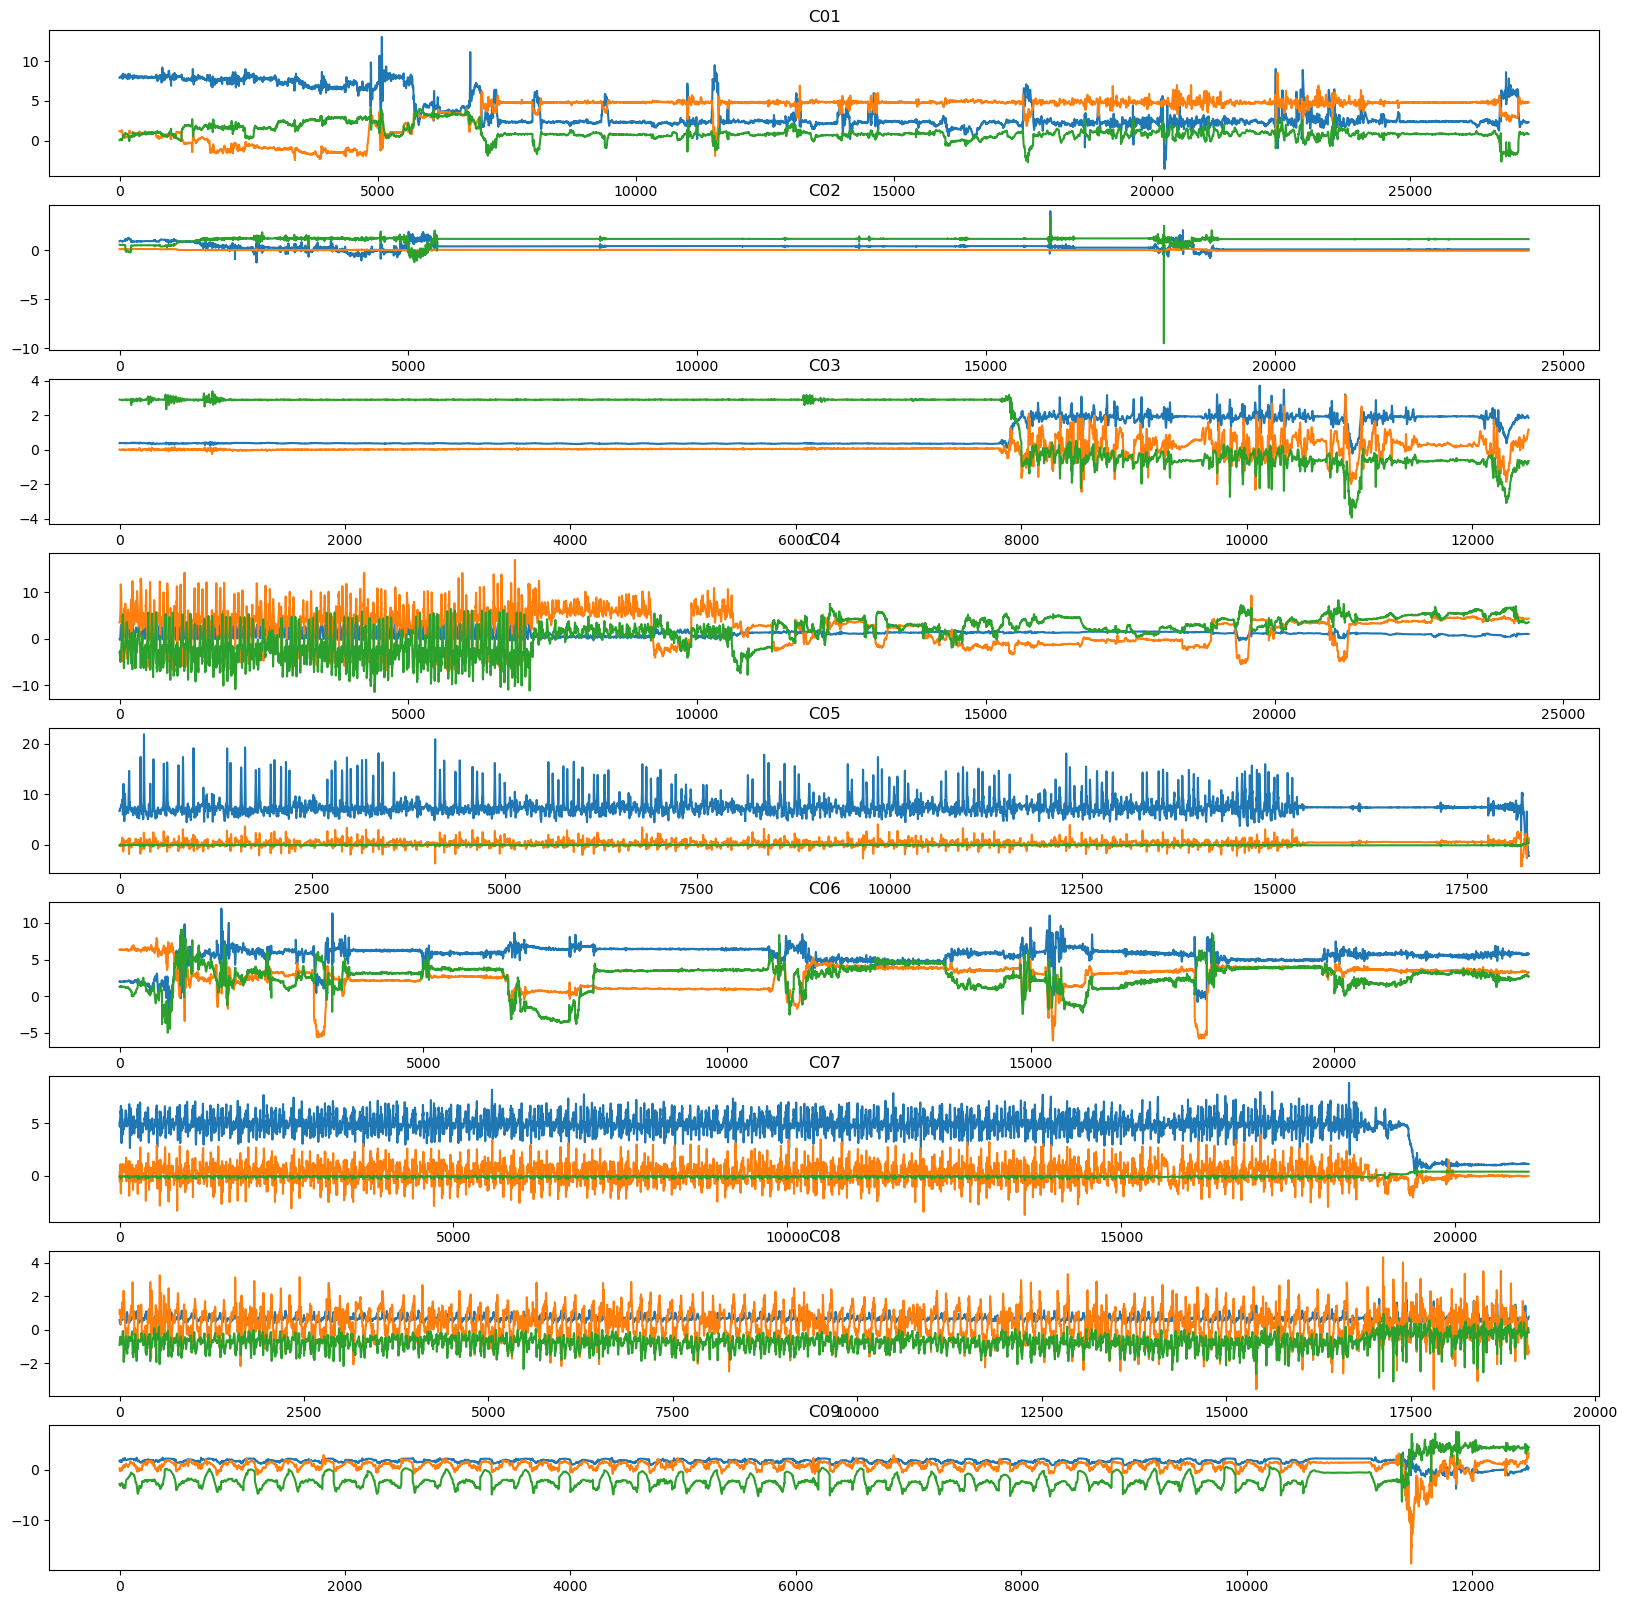

In [12]:
fig , axes = plt.subplots(9 , 1 , figsize = (20 , 20))

for row , class_ in enumerate(os.listdir('./datasets/train')) :
    
    file = glob.glob(f'./datasets/train/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    for col in df.columns[ : 3] :
        
        axes[row].plot(df[col])
        axes[row].set_title(class_)

plt.show()

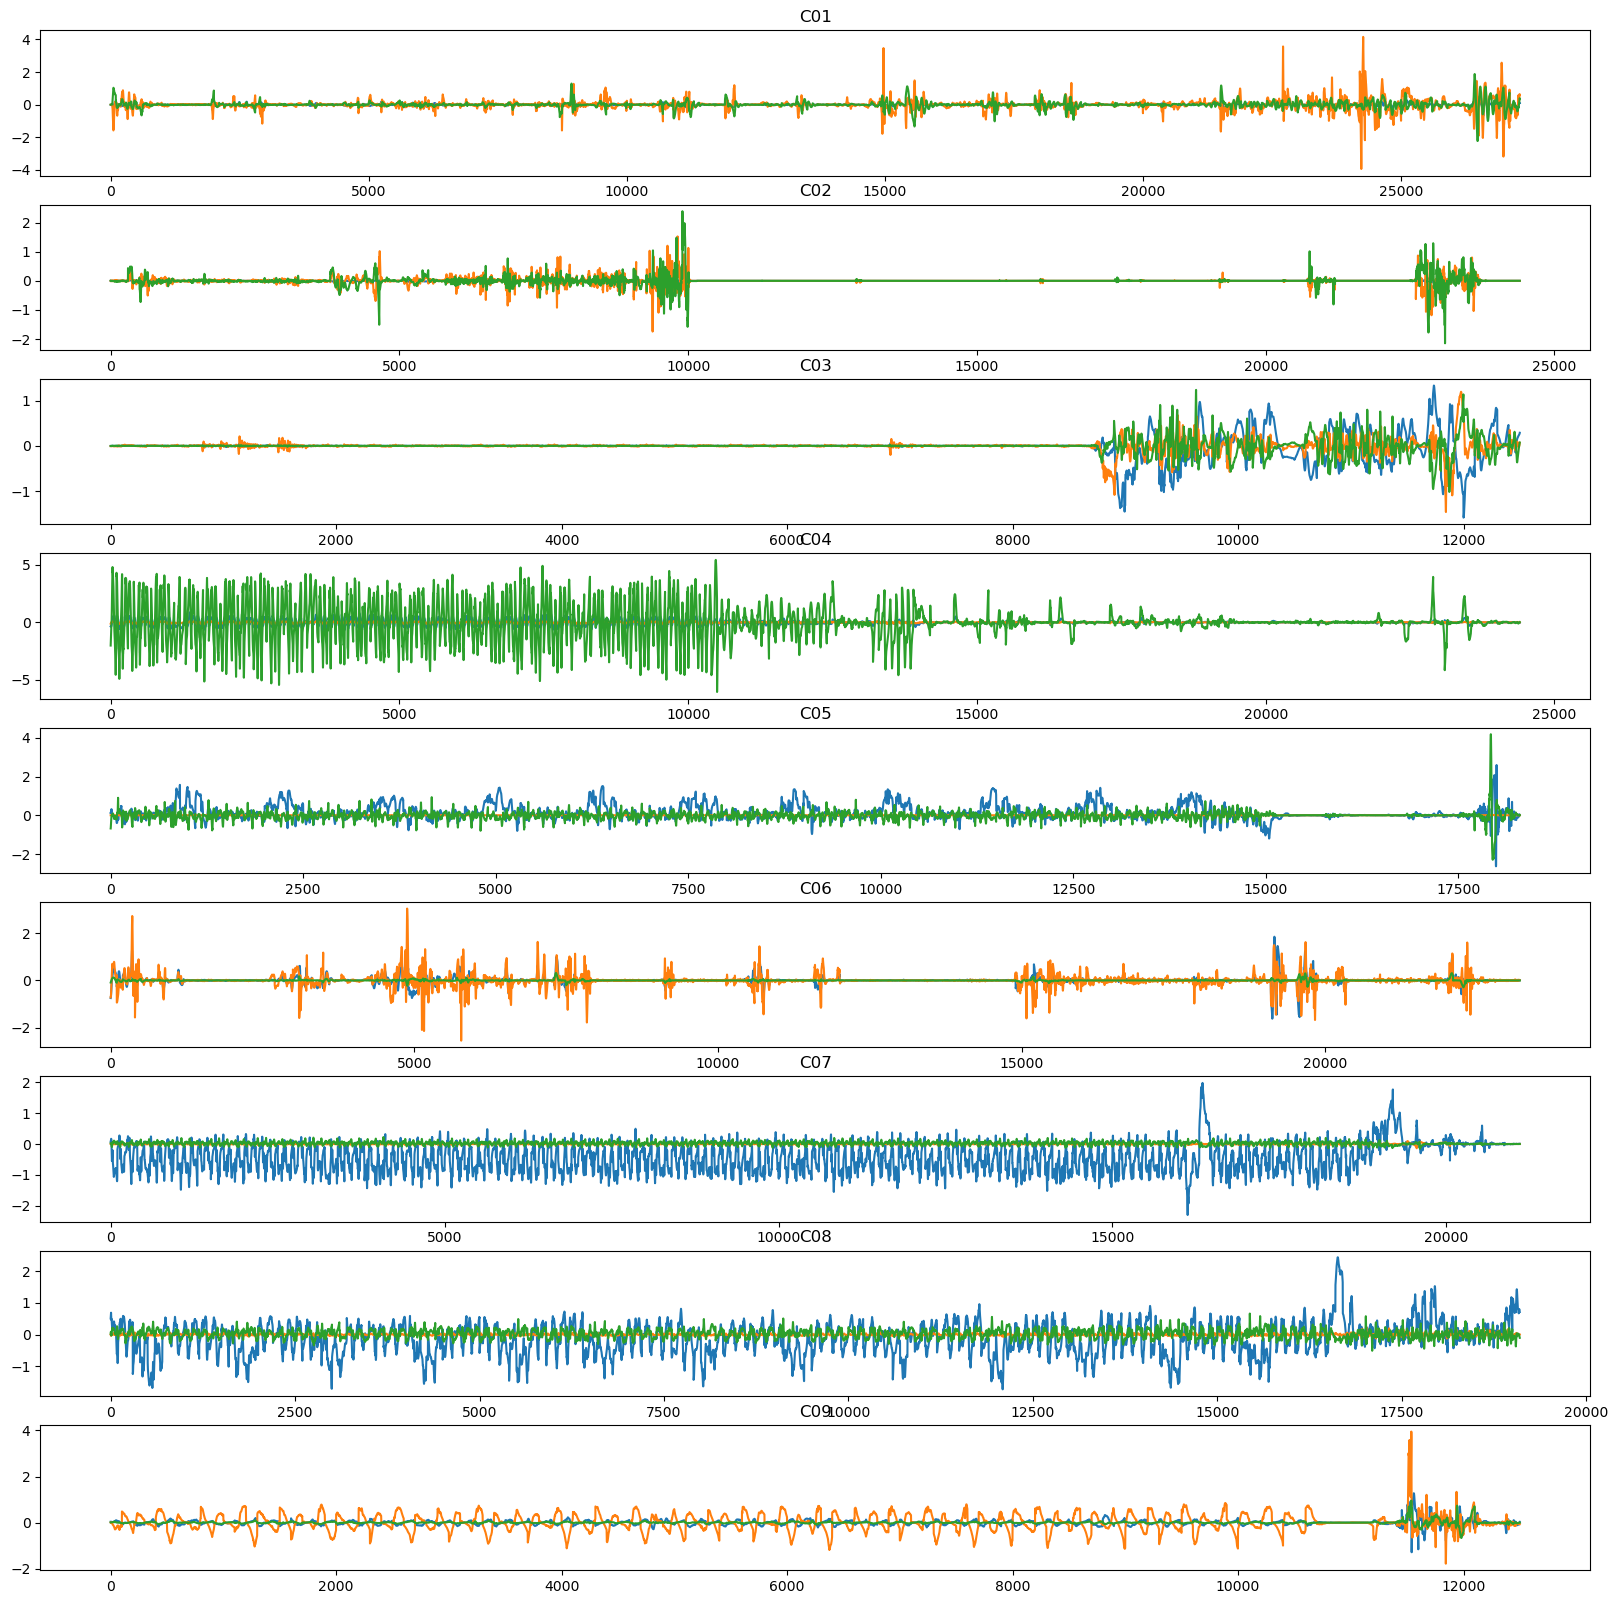

In [13]:
fig , axes = plt.subplots(9 , 1 , figsize = (20 , 20))

for row , class_ in enumerate(os.listdir('./datasets/train')) :
    
    file = glob.glob(f'./datasets/train/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    for col in df.columns[3 : ] :
        
        axes[row].plot(df[col])
        axes[row].set_title(class_)

plt.show()

In [14]:
labels = os.listdir('./datasets/train')

class_means = {
    'x_mean' : [] ,
    'y_mean' : [] ,
    'z_mean' : []
}

for row , class_ in enumerate(os.listdir('./datasets/train')) :
    
    file = glob.glob(f'./datasets/train/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    class_means['x_mean'].append(df['Acc_X'].mean())
    class_means['y_mean'].append(df['Acc_Y'].mean())   
    class_means['z_mean'].append(df['Acc_Z'].mean())


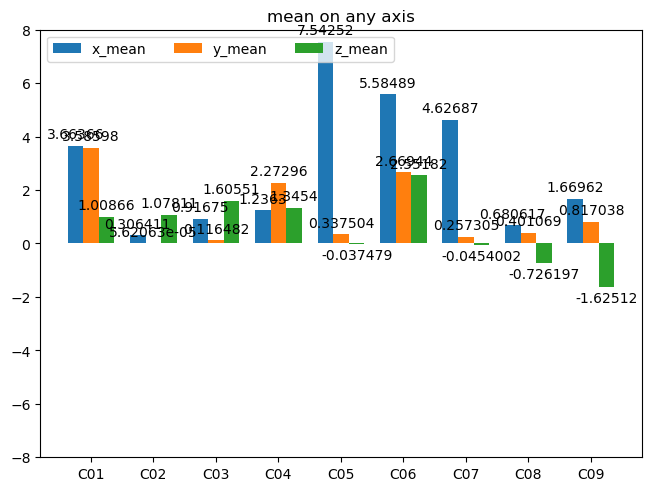

In [15]:
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in class_means.items():
    
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('mean on any axis')
ax.set_xticks(x + width, labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-8, 8)

plt.show()

In [16]:
labels = os.listdir('./datasets/train')

class_means = {
    'x_var' : [] ,
    'y_var' : [] ,
    'z_var' : []
}

for row , class_ in enumerate(os.listdir('./datasets/train')) :
    
    file = glob.glob(f'./datasets/train/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    class_means['x_var'].append(df['Acc_X'].var())
    class_means['y_var'].append(df['Acc_Y'].var())
    class_means['z_var'].append(df['Acc_Z'].var())

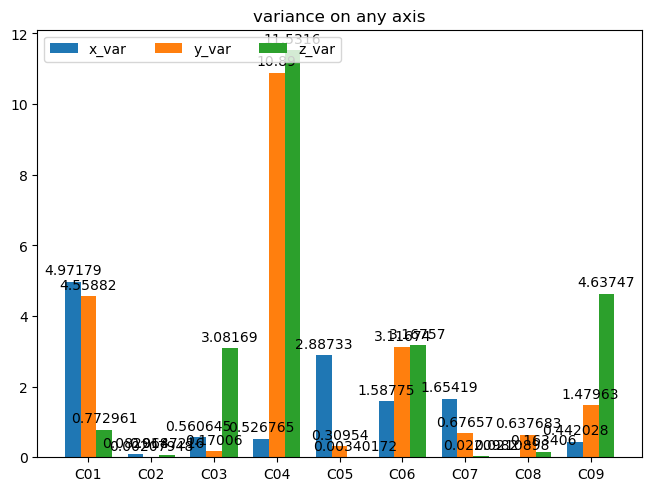

In [17]:
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in class_means.items():
    
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('variance on any axis')
ax.set_xticks(x + width, labels)
ax.legend(loc='upper left', ncols=3)

plt.show()

## Cutting Dataframe & Features Engineering

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def raw_to_features(df , index) :
    
    freq = np.fft.fftfreq(len(df['Acc_X'])) * 100
    
    

    start = 0
    divide = 2
    
    acc_x_fourier = np.abs(np.fft.fft(df['Acc_X'])[start:len(df['Acc_X']) // divide]).real
    acc_y_fourier = np.abs(np.fft.fft(df['Acc_Y'])[start:len(df['Acc_Y']) // divide]).real
    acc_z_fourier = np.abs(np.fft.fft(df['Acc_Z'])[start:len(df['Acc_Z']) // divide]).real
    gyro_x_fourier = np.abs(np.fft.fft(df['Gyr_X'])[start:len(df['Gyr_X']) // divide]).real
    gyro_y_fourier = np.abs(np.fft.fft(df['Gyr_Y'])[start:len(df['Gyr_Y']) // divide]).real
    gyro_z_fourier = np.abs(np.fft.fft(df['Gyr_Z'])[start:len(df['Gyr_Z']) // divide]).real
    
    
    result_df = pd.DataFrame({
        
        'acc_x_mean' : df['Acc_X'].mean() ,
        'acc_y_mean' : df['Acc_Y'].mean() ,
        'acc_z_mean' : df['Acc_Z'].mean() ,
        
        'gyro_x_mean' : df['Gyr_X'].mean() ,
        'gyro_y_mean' : df['Gyr_Y'].mean() ,
        'gyro_z_mean' : df['Gyr_Z'].mean() ,
        
        'acc_x_var' : df['Acc_X'].var() ,
        'acc_y_var' : df['Acc_Y'].var() ,
        'acc_z_var' : df['Acc_Z'].var() ,
        
        'gyro_x_var' : df['Gyr_X'].var() ,
        'gyro_y_var' : df['Gyr_Y'].var() ,
        'gyro_z_var' : df['Gyr_Z'].var() ,
        
        'acc_x_std' : df['Acc_X'].std() ,
        'acc_y_std' : df['Acc_Y'].std() ,
        'acc_z_std' : df['Acc_Z'].std() ,
        
        'gyro_x_std' : df['Gyr_X'].std() ,
        'gyro_y_std' : df['Gyr_Y'].std() ,
        'gyro_z_std' : df['Gyr_Z'].std() ,
        
        'acc_x_fourier_mean' : acc_x_fourier.mean() , 
        'acc_y_fourier_mean' : acc_y_fourier.mean() , 
        'acc_z_fourier_mean' : acc_z_fourier.mean() , 
        
        'gyro_x_fourier_mean' : gyro_x_fourier.mean() , 
        'gyro_y_fourier_mean' : gyro_y_fourier.mean() , 
        'gyro_z_fourier_mean' : gyro_z_fourier.mean() , 

        'acc_x_fourier_var' : acc_x_fourier.var() , 
        'acc_y_fourier_var' : acc_y_fourier.var() , 
        'acc_z_fourier_var' : acc_z_fourier.var() , 
        
        'gyro_x_fourier_var' : gyro_x_fourier.var() , 
        'gyro_y_fourier_var' : gyro_y_fourier.var() , 
        'gyro_z_fourier_var' : gyro_z_fourier.var() , 
        
        'acc_x_fourier_std' : acc_x_fourier.std() , 
        'acc_y_fourier_std' : acc_y_fourier.std() , 
        'acc_z_fourier_std' : acc_z_fourier.std() , 

        'gyro_x_fourier_std' : gyro_x_fourier.std() , 
        'gyro_y_fourier_std' : gyro_y_fourier.std() , 
        'gyro_z_fourier_std' : gyro_z_fourier.std() , 
        
        # 'acc_x_max_mag' : freq[np.abs(np.fft.fft(df['Acc_X'])[start:len(df['Acc_X']) // divide]).real.argmax() + start],
        # 'acc_y_max_mag' : freq[np.abs(np.fft.fft(df['Acc_Y'])[start:len(df['Acc_Y']) // divide]).real.argmax() + start],
        # 'acc_z_max_mag' : freq[np.abs(np.fft.fft(df['Acc_Z'])[start:len(df['Acc_Z']) // divide]).real.argmax() + start],
        
        # 'gyro_x_max_mag' : freq[np.abs(np.fft.fft(df['Gyr_X'])[start:len(df['Gyr_X']) // divide]).real.argmax() + start],
        # 'gyro_y_max_mag' : freq[np.abs(np.fft.fft(df['Gyr_Y'])[start:len(df['Gyr_Y']) // divide]).real.argmax() + start],
        # 'gyro_z_max_mag' : freq[np.abs(np.fft.fft(df['Gyr_Z'])[start:len(df['Gyr_Z']) // divide]).real.argmax() + start],
        
        
    }, index = [index])
    
    return result_df

In [20]:
idx = 0

for file_path in glob.glob('./datasets/train/*/*') :
    
    label = file_path.split('\\')[-2]
    
    df = pd.read_csv(file_path)
    
    size = len(df)
    
    for i in range(0 , size , 500) :
        
        if (i + 500 < size) :
            
            raw_df = df.iloc[i : i + 500]
            
            featured_df = raw_to_features(raw_df , idx)
            featured_df['label'] = label
            featured_df.to_csv(f'./database/{idx}.csv' , index=False)
            
            idx += 1

In [21]:
train_df = pd.concat(pd.read_csv(file_path) for file_path in glob.glob('./database/*'))
train_df.index = pd.Series(np.arange(len(train_df)))
train_df.index.name = 'id'
train_df

,acc_x_mean,acc_y_mean,acc_z_mean,gyro_x_mean,gyro_y_mean,gyro_z_mean,acc_x_var,acc_y_var,acc_z_var,gyro_x_var,...,gyro_x_fourier_var,gyro_y_fourier_var,gyro_z_fourier_var,acc_x_fourier_std,acc_y_fourier_std,acc_z_fourier_std,gyro_x_fourier_std,gyro_y_fourier_std,gyro_z_fourier_std,label
id,,,,,,,,,,,,,,,,,,,,,
0,8.017583,0.871290,0.635488,-0.006054,-0.052014,0.106916,0.014103,0.051462,0.071236,0.004701,...,2.066571,96.769078,47.124362,252.956166,27.830304,20.694191,1.437557,9.837128,6.864719,C01
1,8.003464,0.711128,0.891213,-0.008977,-0.024072,-0.059949,0.077904,0.055595,0.034180,0.000551,...,0.323358,4.427330,12.388020,252.466861,22.895931,28.320554,0.568646,2.104122,3.519662,C01
2,7.864499,0.838868,1.089927,-0.005565,0.059260,0.017958,1.371722,0.439601,0.695187,0.001561,...,0.726690,13.764624,2.671771,248.708712,29.539118,38.582026,0.852461,3.710071,1.634555,C01
3,7.543340,0.099071,2.213537,-0.000245,-0.001631,0.000313,0.001857,0.001178,0.003605,0.000003,...,0.001106,0.032070,0.002659,238.033849,3.169280,69.839080,0.033257,0.179080,0.051561,C01
4,5.080976,0.260647,-0.051888,-0.522942,0.000431,0.014083,1.129699,1.137449,0.005738,0.203727,...,350.673368,0.107095,1.739593,161.034335,22.556930,2.206466,18.726275,0.327254,1.318936,C07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,5.034795,0.316417,-0.045964,-0.486062,0.000523,0.012957,1.210797,1.111457,0.005636,0.263591,...,347.533775,0.090930,2.130261,159.500138,22.739796,2.061426,18.642258,0.301546,1.459541,C07
1277,5.108823,0.232414,-0.040736,-0.468647,0.001358,0.010762,1.355341,0.980543,0.004880,0.160689,...,286.142510,0.079740,1.925256,162.070240,20.573732,1.843495,16.915747,0.282383,1.387536,C07
1278,5.059095,0.218289,-0.052092,-0.537452,0.000870,0.020606,1.302368,1.177552,0.005108,0.273914,...,403.323515,0.094152,2.322857,160.496745,22.168989,2.130780,20.082916,0.306841,1.524092,C07


In [22]:
test_df = pd.concat( raw_to_features(pd.read_csv(file_path), 0) for file_path in sorted(glob.glob('./datasets/test/*')))

test_df.index = pd.Series( file_path.split('\\')[-1] for file_path in sorted(glob.glob('./datasets/test/*')))
test_df.index.name = 'id'

test_df

,acc_x_mean,acc_y_mean,acc_z_mean,gyro_x_mean,gyro_y_mean,gyro_z_mean,acc_x_var,acc_y_var,acc_z_var,gyro_x_var,...,acc_z_fourier_var,gyro_x_fourier_var,gyro_y_fourier_var,gyro_z_fourier_var,acc_x_fourier_std,acc_y_fourier_std,acc_z_fourier_std,gyro_x_fourier_std,gyro_y_fourier_std,gyro_z_fourier_std
id,,,,,,,,,,,,,,,,,,,,,
000ba64d-bc61-4e0f-b1f1-87cf4a8d97b3.csv,4.072637,1.210312,-0.192467,0.039451,0.002986,0.002493,0.441533,0.173596,0.006280,0.120989,...,39.313593,58.568277,0.986100,0.811289,128.900398,38.912204,6.270055,7.652991,0.993026,0.900716
00830c34-f50e-4213-87dd-84235401ea61.csv,0.014690,0.174293,2.955123,0.000840,-0.002962,0.000437,0.000128,0.000199,0.000178,0.000028,...,8695.935178,0.010925,0.082715,0.003672,0.507198,5.496000,93.251998,0.104522,0.287602,0.060596
00944d21-19f4-4783-a7c4-69a9d063c8dd.csv,4.936035,0.182373,-0.034510,0.535964,0.001114,-0.014011,0.963861,1.948571,0.006884,0.087185,...,3.707008,314.598019,0.067805,1.455822,156.132219,28.445308,1.925359,17.736911,0.260394,1.206574
00ae23cd-1c86-465d-b108-e82b8267906e.csv,5.122099,0.133693,-0.011783,-0.006069,-0.000267,-0.000161,0.001790,0.004220,0.000009,0.000567,...,0.139815,0.269458,0.000256,0.000733,161.615863,4.347821,0.373918,0.519094,0.016012,0.027074
018b1306-c9b3-4a12-b393-ace3ec021e77.csv,7.639876,-0.083152,-0.066714,0.122930,0.000056,0.064252,3.010801,0.359682,0.004756,0.093023,...,5.944523,50.793735,0.000214,35.148962,242.199444,11.187565,2.438139,7.126972,0.014638,5.928656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe89e0e3-769b-406b-af56-862b4f1f6221.csv,4.990616,-0.200428,-0.080085,0.541465,0.001804,-0.028220,1.111405,1.592352,0.004906,0.180638,...,7.918233,362.060154,0.085757,2.979563,158.073762,24.879573,2.813936,19.027878,0.292844,1.726141
ff291506-8227-416d-abf8-1d5ed17d57f1.csv,6.759846,0.059255,-1.871897,-0.003234,-0.001103,0.000017,0.001150,0.000894,0.006325,0.000088,...,3486.487347,0.048216,0.014097,0.000010,213.310776,1.936135,59.046485,0.219580,0.118731,0.003110
ff400e2b-316d-4b48-ace6-df3e7cc24d60.csv,0.684410,0.124158,-0.711651,-0.374836,0.004359,0.025510,0.021326,1.210701,0.166632,0.202058,...,557.956415,225.180251,0.363909,16.849469,21.710205,22.601330,23.621101,15.006007,0.603249,4.104810


## Model Inference

In [23]:
from autogluon.tabular import TabularPredictor

In [24]:
label = 'label'

In [25]:
predictor = TabularPredictor(label = label).fit(train_df)

No path specified. Models will be saved in: "AutogluonModels\ag-20240719_101012"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240719_101012"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
Memory Avail:      

In [26]:
predictor.refit_full()

Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models ...
Fitting model: KNeighborsUnif_FULL ...
	0.0s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: KNeighborsDist_FULL ...
	0.01s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: NeuralNetFastAI_FULL ...
	Stopping at the best epoch learned earlier - 18.
	0.81s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: LightGBMXT_FULL ...
	0.75s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: LightGBM_FULL ...
	0.84s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: RandomForestGini_FULL ...
	0.63s	 = Trainin

{'KNeighborsUnif': 'KNeighborsUnif_FULL',
 'KNeighborsDist': 'KNeighborsDist_FULL',
 'NeuralNetFastAI': 'NeuralNetFastAI_FULL',
 'LightGBMXT': 'LightGBMXT_FULL',
 'LightGBM': 'LightGBM_FULL',
 'RandomForestGini': 'RandomForestGini_FULL',
 'RandomForestEntr': 'RandomForestEntr_FULL',
 'CatBoost': 'CatBoost_FULL',
 'ExtraTreesGini': 'ExtraTreesGini_FULL',
 'ExtraTreesEntr': 'ExtraTreesEntr_FULL',
 'XGBoost': 'XGBoost_FULL',
 'NeuralNetTorch': 'NeuralNetTorch_FULL',
 'LightGBMLarge': 'LightGBMLarge_FULL',
 'WeightedEnsemble_L2': 'WeightedEnsemble_L2_FULL'}

In [27]:
predictor.fit_pseudolabel(test_df)

Given test_data for pseudo labeling did not contain labels. AutoGluon will assign pseudo labels to data and use it for extra training data...
Beginning iteration 1 of pseudolabeling out of max 3
Pseudolabeling algorithm confidently assigned pseudolabels to 36 rows of data on iteration 1. Adding to train data
Fitting 13 L1 models ...
Fitting model: KNeighborsUnif_PSEUDO_1 ...
	0.9494	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: KNeighborsDist_PSEUDO_1 ...
	0.9494	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI_PSEUDO_1 ...
	0.9922	 = Validation score   (accuracy)
	1.03s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMXT_PSEUDO_1 ...
	0.9961	 = Validation score   (accuracy)
	0.9s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM_PSEUDO_1 ...
	0.9961	 = Validation score   (accuracy)
	0.91s	 = Training   ru

In [28]:
prediction = predictor.predict(test_df)

In [29]:
prediction

id
000ba64d-bc61-4e0f-b1f1-87cf4a8d97b3.csv    C07
00830c34-f50e-4213-87dd-84235401ea61.csv    C03
00944d21-19f4-4783-a7c4-69a9d063c8dd.csv    C07
00ae23cd-1c86-465d-b108-e82b8267906e.csv    C07
018b1306-c9b3-4a12-b393-ace3ec021e77.csv    C05
                                           ... 
fe89e0e3-769b-406b-af56-862b4f1f6221.csv    C07
ff291506-8227-416d-abf8-1d5ed17d57f1.csv    C06
ff400e2b-316d-4b48-ace6-df3e7cc24d60.csv    C08
ffa6db04-5c01-42d2-83cd-5e42d0b7b9af.csv    C07
fff0e206-7478-4daa-959d-ad3764fc7cb1.csv    C02
Name: label, Length: 974, dtype: object

In [30]:
features_importance = predictor.feature_importance(train_df)
features_importance

Computing feature importance via permutation shuffling for 36 features using 1281 rows with 5 shuffle sets...
	28.23s	= Expected runtime (5.65s per shuffle set)
	3.08s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
acc_x_fourier_var,0.002186,0.001158,0.006733,5,0.004570,-0.000198
acc_x_mean,0.000937,0.001018,0.054350,5,0.003032,-0.001159
acc_z_fourier_std,0.000781,0.000000,0.500000,5,0.000781,0.000781
acc_x_fourier_std,0.000781,0.000552,0.017055,5,0.001917,-0.000356
gyro_x_var,0.000781,0.000781,0.044505,5,0.002388,-0.000827
gyro_z_fourier_mean,0.000312,0.000698,0.186950,5,0.001750,-0.001125
gyro_x_fourier_mean,0.000312,0.000428,0.088904,5,0.001193,-0.000568
acc_z_std,0.000156,0.000349,0.186950,5,0.000875,-0.000563
acc_z_mean,0.000156,0.000349,0.186950,5,0.000875,-0.000563
gyro_x_fourier_std,0.000156,0.000349,0.186950,5,0.000875,-0.000563


In [31]:
features_importance.to_csv('./features/features.csv')

In [32]:
prediction.value_counts()

label
C07    187
C08    125
C05    120
C04    118
C06     99
C09     87
C01     84
C03     77
C02     77
Name: count, dtype: int64

In [33]:
submission_path = './submissions'
prediction.to_csv(f'{submission_path}/submission.csv')

### Evaluation

In [34]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
pred = predictor.predict(train_df)
label = train_df['label']

In [36]:
pred.value_counts()

label
C04    188
C01    184
C06    168
C02    157
C07    139
C08    135
C03    116
C05    116
C09     78
Name: count, dtype: int64

In [37]:
label.value_counts()

label
C04    188
C01    184
C06    168
C02    157
C07    139
C08    135
C03    116
C05    116
C09     78
Name: count, dtype: int64

In [38]:
confusion_matrix = confusion_matrix(pred , label)

In [39]:
confusion_matrix

array([[184,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 157,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 116,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 188,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 116,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 168,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 139,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  78]], dtype=int64)

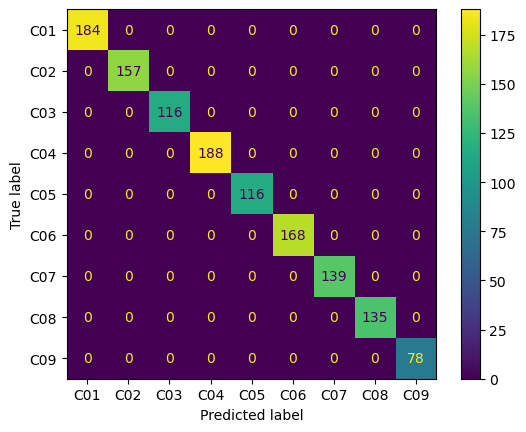

In [40]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix , display_labels = os.listdir('./datasets/train'))
display.plot()

plt.show()